In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../gender_classification.csv')
df.head()
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
X

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink
0,Cool,Rock,Vodka,7UP/Sprite
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi
2,Warm,Rock,Wine,Coca Cola/Pepsi
3,Warm,Folk/Traditional,Whiskey,Fanta
4,Cool,Rock,Vodka,Coca Cola/Pepsi
...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi
62,Cool,Hip hop,Beer,Coca Cola/Pepsi
63,Neutral,Hip hop,Doesn't drink,Fanta
64,Cool,Rock,Wine,Coca Cola/Pepsi


## Visualization of In-dependent with dependent variable

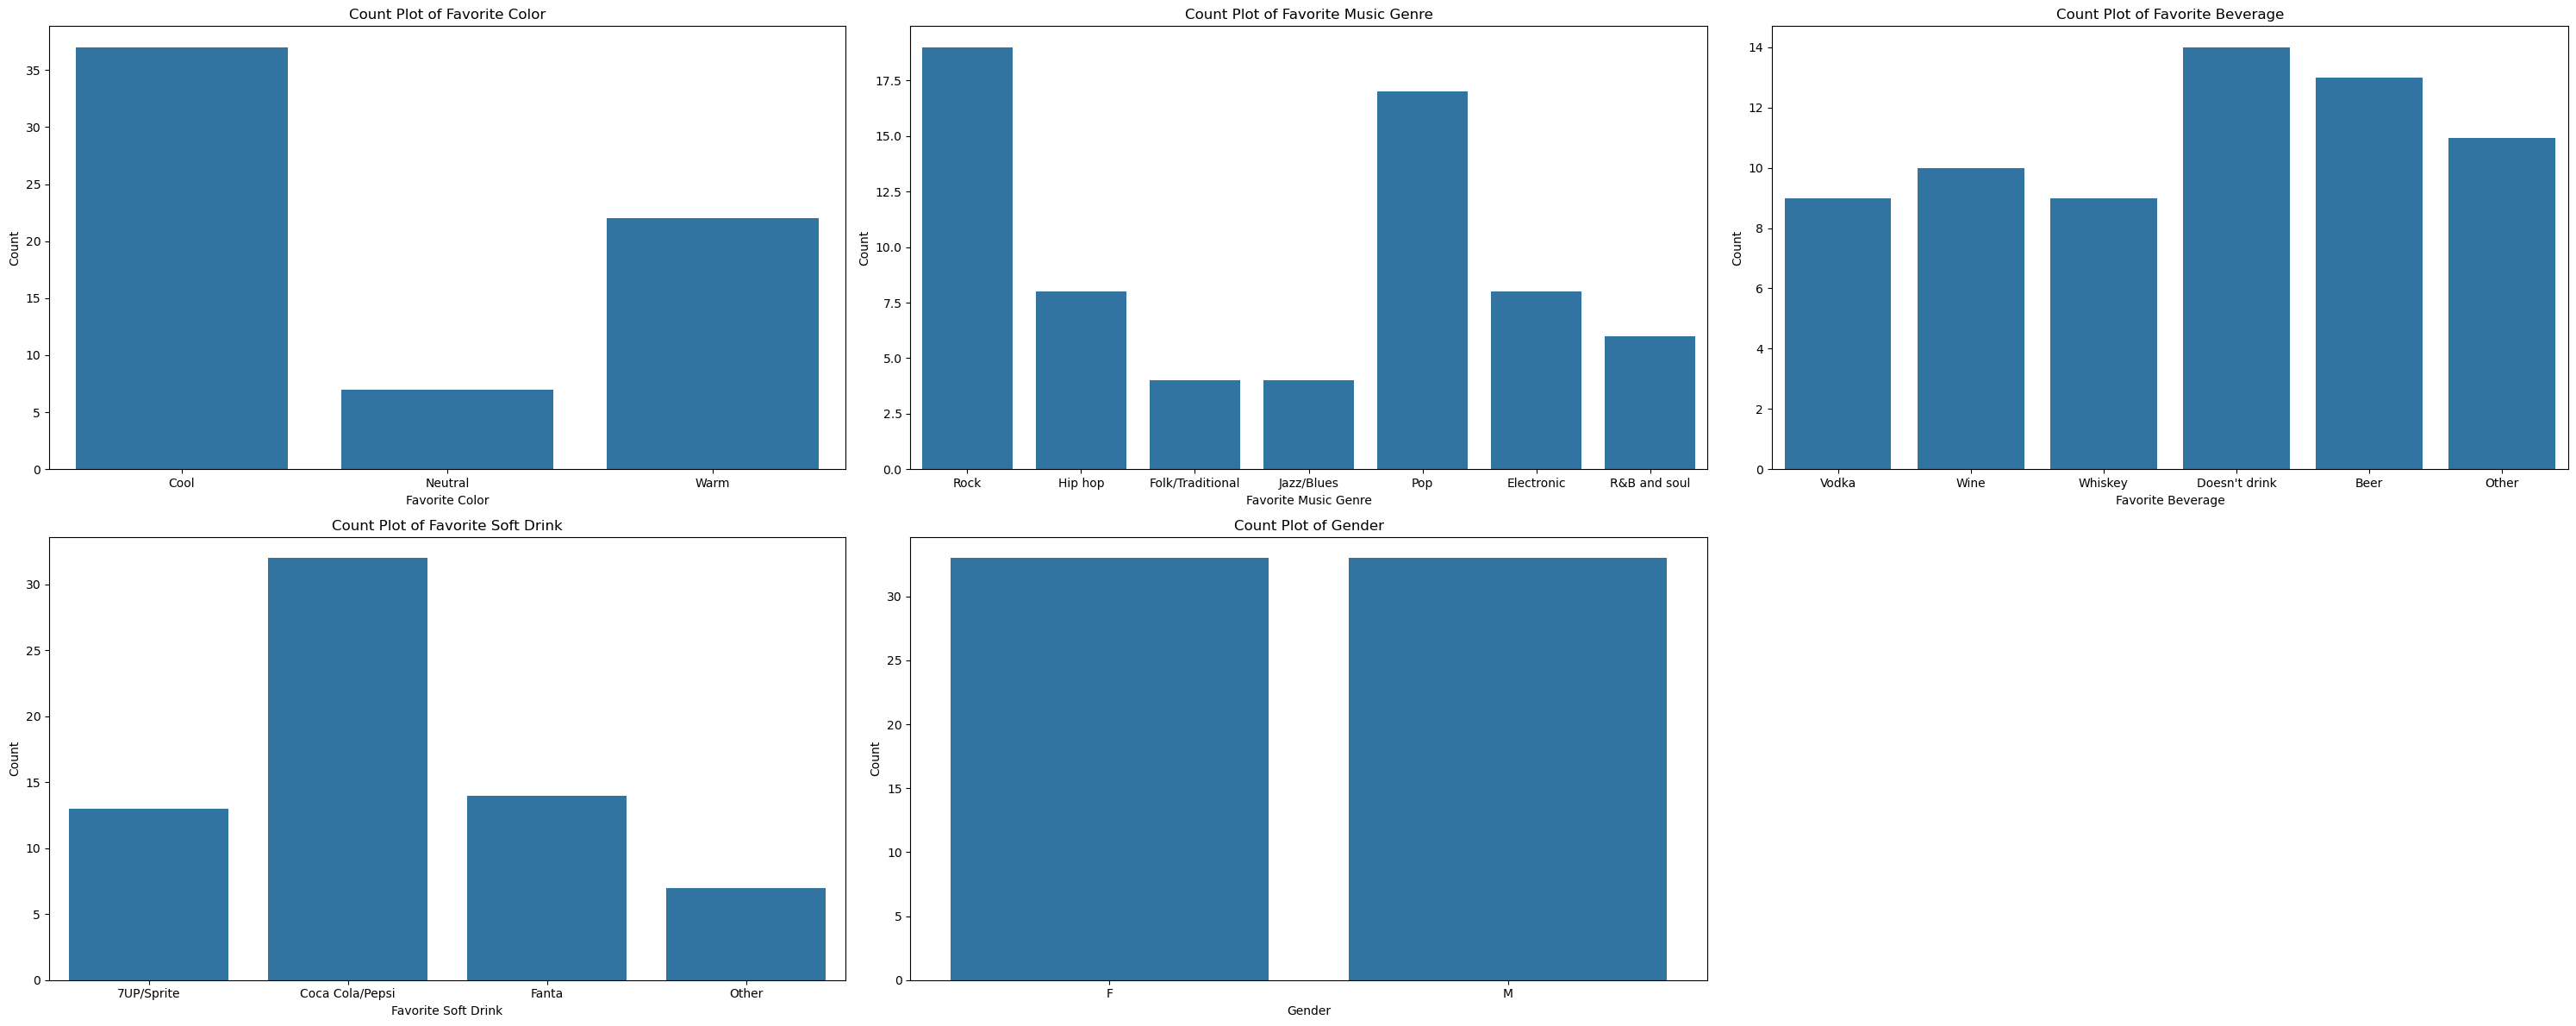

In [3]:
# for col in df.columns:
#     plt.figure(figsize=(10, 6))
#     sns.countplot(x=col, data=df)
#     plt.title(f'Count Plot of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Count')
#     plt.show()



# Determine the number of columns and rows
num_cols = 3
num_plots = len(df.columns)
num_rows = (num_plots + num_cols - 1) // num_cols  # This ensures enough rows

# Adjust the figsize to maintain the 10x6 size for each subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10 * num_cols, 6 * num_rows))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(df.columns):
    ax = axes[i]
    sns.countplot(x=col, data=df, ax=ax)
    ax.set_title(f'Count Plot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# Remove any unused subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X.iloc[:, 0] = label_encoder.fit_transform(X.iloc[:, 0])
X

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink
0,0,Rock,Vodka,7UP/Sprite
1,1,Hip hop,Vodka,Coca Cola/Pepsi
2,2,Rock,Wine,Coca Cola/Pepsi
3,2,Folk/Traditional,Whiskey,Fanta
4,0,Rock,Vodka,Coca Cola/Pepsi
...,...,...,...,...
61,0,Rock,Vodka,Coca Cola/Pepsi
62,0,Hip hop,Beer,Coca Cola/Pepsi
63,1,Hip hop,Doesn't drink,Fanta
64,0,Rock,Wine,Coca Cola/Pepsi


In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#Argument should be categorial data feild


# Country column
# Assuming X is your dataset
# Define the ColumnTransformer with OneHotEncoder for the first column (index 0)
ct = ColumnTransformer(
    transformers=[
        ('color', OneHotEncoder(drop='first'), [0])
    ], remainder='passthrough'
)

# Fit and transform the dataset
X = np.array(ct.fit_transform(X))
X

array([[0.0, 0.0, 'Rock', 'Vodka', '7UP/Sprite'],
       [1.0, 0.0, 'Hip hop', 'Vodka', 'Coca Cola/Pepsi'],
       [0.0, 1.0, 'Rock', 'Wine', 'Coca Cola/Pepsi'],
       [0.0, 1.0, 'Folk/Traditional', 'Whiskey', 'Fanta'],
       [0.0, 0.0, 'Rock', 'Vodka', 'Coca Cola/Pepsi'],
       [0.0, 1.0, 'Jazz/Blues', "Doesn't drink", 'Fanta'],
       [0.0, 0.0, 'Pop', 'Beer', 'Coca Cola/Pepsi'],
       [0.0, 1.0, 'Pop', 'Whiskey', 'Fanta'],
       [0.0, 1.0, 'Rock', 'Other', '7UP/Sprite'],
       [1.0, 0.0, 'Pop', 'Wine', 'Coca Cola/Pepsi'],
       [0.0, 0.0, 'Pop', 'Other', '7UP/Sprite'],
       [0.0, 1.0, 'Pop', 'Other', '7UP/Sprite'],
       [0.0, 1.0, 'Pop', 'Wine', '7UP/Sprite'],
       [0.0, 1.0, 'Electronic', 'Wine', 'Coca Cola/Pepsi'],
       [0.0, 0.0, 'Rock', 'Beer', 'Coca Cola/Pepsi'],
       [0.0, 1.0, 'Jazz/Blues', 'Wine', 'Coca Cola/Pepsi'],
       [0.0, 0.0, 'Pop', 'Wine', '7UP/Sprite'],
       [0.0, 0.0, 'Rock', 'Other', 'Coca Cola/Pepsi'],
       [0.0, 0.0, 'Rock', 'Other', 'Coca

In [31]:
X[:, 2] = label_encoder.fit_transform(X[:, 2])
X

array([[0.0, 0.0, 6, 'Vodka', '7UP/Sprite'],
       [1.0, 0.0, 2, 'Vodka', 'Coca Cola/Pepsi'],
       [0.0, 1.0, 6, 'Wine', 'Coca Cola/Pepsi'],
       [0.0, 1.0, 1, 'Whiskey', 'Fanta'],
       [0.0, 0.0, 6, 'Vodka', 'Coca Cola/Pepsi'],
       [0.0, 1.0, 3, "Doesn't drink", 'Fanta'],
       [0.0, 0.0, 4, 'Beer', 'Coca Cola/Pepsi'],
       [0.0, 1.0, 4, 'Whiskey', 'Fanta'],
       [0.0, 1.0, 6, 'Other', '7UP/Sprite'],
       [1.0, 0.0, 4, 'Wine', 'Coca Cola/Pepsi'],
       [0.0, 0.0, 4, 'Other', '7UP/Sprite'],
       [0.0, 1.0, 4, 'Other', '7UP/Sprite'],
       [0.0, 1.0, 4, 'Wine', '7UP/Sprite'],
       [0.0, 1.0, 0, 'Wine', 'Coca Cola/Pepsi'],
       [0.0, 0.0, 6, 'Beer', 'Coca Cola/Pepsi'],
       [0.0, 1.0, 3, 'Wine', 'Coca Cola/Pepsi'],
       [0.0, 0.0, 4, 'Wine', '7UP/Sprite'],
       [0.0, 0.0, 6, 'Other', 'Coca Cola/Pepsi'],
       [0.0, 0.0, 6, 'Other', 'Coca Cola/Pepsi'],
       [0.0, 0.0, 4, "Doesn't drink", '7UP/Sprite'],
       [0.0, 0.0, 4, 'Beer', 'Fanta'],
       [0.0, 1

In [32]:

ct = ColumnTransformer(
    transformers=[
        ('music_genre', OneHotEncoder(drop='first'), [2])
    ], remainder='passthrough'
)

# Fit and transform the dataset
X = np.array(ct.fit_transform(X))
X

array([[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 'Vodka', '7UP/Sprite'],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 'Vodka',
        'Coca Cola/Pepsi'],
       [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 'Wine',
        'Coca Cola/Pepsi'],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 'Whiskey', 'Fanta'],
       [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 'Vodka',
        'Coca Cola/Pepsi'],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, "Doesn't drink", 'Fanta'],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 'Beer',
        'Coca Cola/Pepsi'],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 'Whiskey', 'Fanta'],
       [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 'Other', '7UP/Sprite'],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 'Wine',
        'Coca Cola/Pepsi'],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 'Other', '7UP/Sprite'],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 'Other', '7UP/Sprite'],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 'Wine', '7UP/Sprite'],
      

In [33]:
X[:, 8] = label_encoder.fit_transform(X[:, 8])
X

array([[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 3, '7UP/Sprite'],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 3, 'Coca Cola/Pepsi'],
       [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 5, 'Coca Cola/Pepsi'],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 4, 'Fanta'],
       [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 3, 'Coca Cola/Pepsi'],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1, 'Fanta'],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0, 'Coca Cola/Pepsi'],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 4, 'Fanta'],
       [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 2, '7UP/Sprite'],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 5, 'Coca Cola/Pepsi'],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2, '7UP/Sprite'],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 2, '7UP/Sprite'],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 5, '7UP/Sprite'],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 5, 'Coca Cola/Pepsi'],
       [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0, 'Coca Cola

In [34]:

ct = ColumnTransformer(
    transformers=[
        ('fav_bevrege', OneHotEncoder(drop='first'), [8])
    ], remainder='passthrough'
)

# Fit and transform the dataset
X = np.array(ct.fit_transform(X))
X

array([[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
        '7UP/Sprite'],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        'Coca Cola/Pepsi'],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0,
        'Coca Cola/Pepsi'],
       [0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,
        'Fanta'],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
        'Coca Cola/Pepsi'],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0,
        'Fanta'],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,
        'Coca Cola/Pepsi'],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0,
        'Fanta'],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0,
        '7UP/Sprite'],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0,
        'Coca Cola/Pepsi'],
       [0.0, 1.0, 0.0, 0.0, 0.

In [35]:
X[:, 13] = label_encoder.fit_transform(X[:, 13])
X

array([[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
        0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        1],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0,
        1],
       [0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,
        2],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
        1],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0,
        2],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,
        1],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0,
        2],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0,
        0],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0,
        1],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,
        0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.

In [36]:

ct = ColumnTransformer(
    transformers=[
        ('soft_drink', OneHotEncoder(drop='first'), [13])
    ], remainder='passthrough'
)

# Fit and transform the dataset
X = np.array(ct.fit_transform(X))
X

array([[0.0, 0.0, 0.0, ..., 1.0, 0.0, 0.0],
       [1.0, 0.0, 0.0, ..., 0.0, 1.0, 0.0],
       [1.0, 0.0, 0.0, ..., 1.0, 0.0, 1.0],
       ...,
       [0.0, 1.0, 0.0, ..., 0.0, 1.0, 0.0],
       [1.0, 0.0, 0.0, ..., 1.0, 0.0, 0.0],
       [1.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [43]:

from sklearn.preprocessing import LabelEncoder

# Assuming Y is a pandas Series
label_encoder_y = LabelEncoder()
Y = pd.Series(label_encoder_y.fit_transform(Y))
Y


0     0
1     0
2     0
3     0
4     0
     ..
61    1
62    1
63    1
64    1
65    1
Length: 66, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [45]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

# Will only scale X

In [46]:
from sklearn.neighbors import KNeighborsClassifier  # NON-Linear
classifier = KNeighborsClassifier(n_neighbors=8,metric='minkowski',p=2)
classifier.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=8)

In [47]:
Y_pred=classifier.predict(X_test)
Y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0])

# Accuracy Check

In [48]:
from sklearn.metrics import r2_score
r2=r2_score(Y_test,Y_pred)
print(r2)

-1.4499999999999997


## Confusion Matrix

In [49]:
from sklearn.metrics import confusion_matrix # Function not class
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[3, 1],
       [6, 4]])